### A1

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
inf = float('inf')

In [35]:
f = open('wenigerKrumm4.txt')
lines = f.readlines() 
data = []
for line in lines:
    x, y = line.split()
    data.append((float(x), float(y)))

xs = [pos[0] for pos in data]
ys = [pos[1] for pos in data]

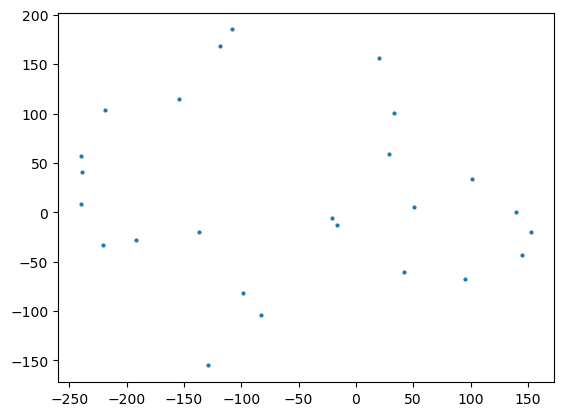

In [36]:
plt.scatter(xs, ys,s=4)

### Winkelberechnung

In [52]:
def abbiegeWinkel(x1,y1,x2,y2,x3,y3):
    v1x = x2-x1
    v1y = y2-y1
    v2x = x3-x2
    v2y = y3-y2
    diff = math.degrees(math.atan2(v2y,v2x)) - math.degrees(math.atan2(v1y,v1x))
    if diff > 180: diff = diff-360
    elif diff < -180: diff = 360+diff
    return diff

def nearest(p, pp):
    best = None
    best_val = inf
    for p1 in pp:
        val = math.dist(p,p1)
        if val < best_val:
            best_val = val
            best = p1
    return best

-130.60129464500446

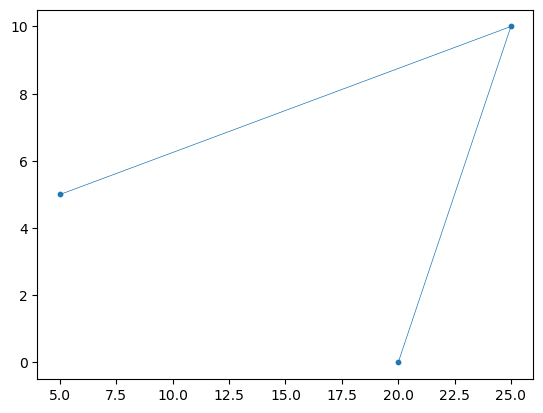

In [72]:
data1 = [(5,5),(25,10),(20,0)]
xs1 = [pos[0] for pos in data1]
ys1 = [pos[1] for pos in data1]
plt.scatter(xs1,ys1,s=10)
plt.plot(xs1, ys1, linewidth=0.5)
x1, x2, x3 = xs1
y1, y2, y3 = ys1
abbiegeWinkel(x1,y1,x2,y2,x3,y3)

#### Greedy ohne Berücksichtigung der Winkel

Wir beginnen bei einer beliebigen Position wählen immer den nächstgelegenen Punkt

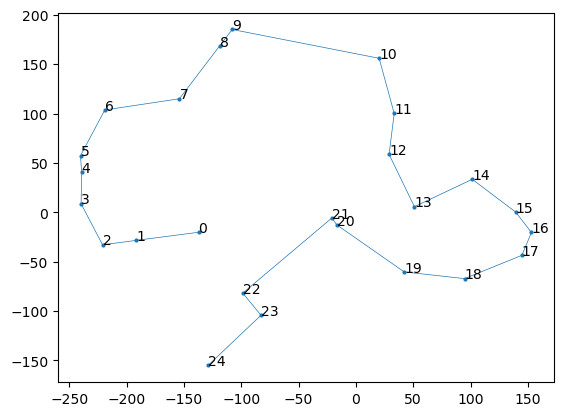

In [76]:
path = []
notvisited = set(data)
path.append(data[14])
notvisited.remove(path[0])

while notvisited:
    next = nearest(path[-1],notvisited)
    path.append(next)
    notvisited.remove(next)
    
plt.scatter(xs, ys,s=4)
pathx = [p[0] for p in path]
pathy = [p[1] for p in path]
 
plt.plot(pathx, pathy, linewidth=0.5);
for i in range(len(path)):
    plt.text(pathx[i], pathy[i],i)

In [80]:
for i in range(1,len(path)-1):
    p1 = path[i-1]
    p2 = path[i]
    p3 = path[i+1]
    x1,y1 = p1
    x2,y2 = p2
    x3,y3 = p3
    winkel = abbiegeWinkel(x1,y1,x2,y2,x3,y3)
    obacht = '***' if abs(winkel) >= 90 else ''
    print(i, abbiegeWinkel(x1,y1,x2,y2,x3,y3),obacht)

1 0.11049369424139854 
2 -74.4594102744395 
3 -25.020479284433563 
4 3.9994303540648843 
5 -27.85861140773089 
6 -55.47247345318549 
7 46.84161874536168 
8 -0.1574840911639015 
9 -69.3835270990262 
10 -63.919921660480085 
11 -19.413512421154167 
12 28.80472630845793 
13 96.10575622693142 ***
14 -69.98831592021783 
15 -15.172904191278704 
16 -53.34708429485434 
17 -44.99531687827526 
18 -32.58355549676992 
19 -31.655293657565124 
20 -19.957241548548836 
21 103.32078338516578 ***
22 80.97438934366514 
23 -77.62973979809848 
